# K-Means Clustering

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('iris.csv')


#DATA PREPROCESSING



In [ ]:
df = dataset.reindex(columns=["species","petal_width","petal_length","sepal_width","sepal_length"])
df.insert(0, 'ID', range(1, len(df) + 1))
X = df.iloc[:, [3, 4]].values

In [ ]:
df.head

<bound method NDFrame.head of       ID         species  petal_width  petal_length  sepal_width  sepal_length
0      1     Iris-setosa          0.2           1.4          3.5           5.1
1      2     Iris-setosa          0.2           1.4          3.0           4.9
2      3     Iris-setosa          0.2           1.3          3.2           4.7
3      4     Iris-setosa          0.2           1.5          3.1           4.6
4      5     Iris-setosa          0.2           1.4          3.6           5.0
..   ...             ...          ...           ...          ...           ...
145  146  Iris-virginica          2.3           5.2          3.0           6.7
146  147  Iris-virginica          1.9           5.0          2.5           6.3
147  148  Iris-virginica          2.0           5.2          3.0           6.5
148  149  Iris-virginica          2.3           5.4          3.4           6.2
149  150  Iris-virginica          1.8           5.1          3.0           5.9

[150 rows x 6 columns

## Using the elbow method to find the optimal number of clusters

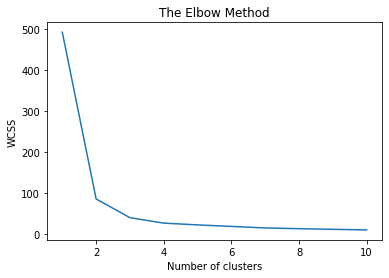

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<h3>From the Elbow Method we can see that k value is 3 or the optimal number of clusters is 3</h3>


## Training the K-Means model on the dataset

In [ ]:

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

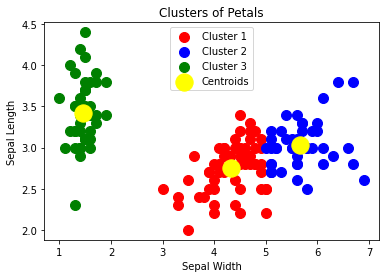

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Petals')
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.legend()
plt.show()